### 1.  Import Required Libraries
Import the necessary libraries, including NumPy, Matplotlib, and Scikit-learn.

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

### 2.  Create and Visualize Dataset
Create a dataset using the make_blobs function from Scikit-learn and visualize it using a scatter plot.
#### TODO: Try generating different Dataset

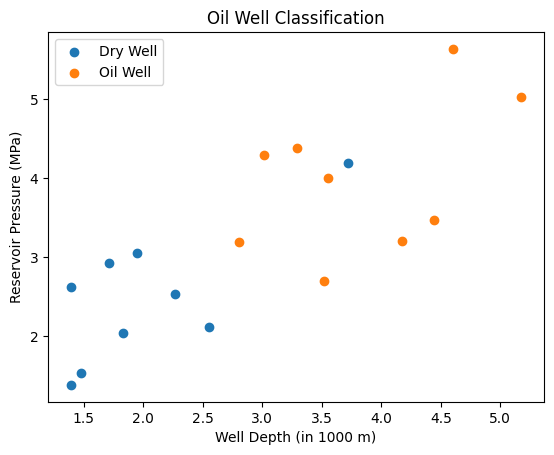

In [2]:
# Create linearly separable points
X, y = make_blobs(n_samples=18, centers=[(2, 2), (4, 4)])

# Create a scatter plot for each class
for i in [0, 1]:
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')

plt.title("Oil Well Classification")
plt.xlabel("Well Depth (in 1000 m)")
plt.ylabel("Reservoir Pressure (MPa)")
plt.legend(['Dry Well', 'Oil Well'])
plt.show()

### 3.  Fit Logistic Regression Model
Fit a Logistic Regression model to the dataset.

In [3]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)  # Fit the model to the data

LogisticRegression()

### 4.  Visualize Decision Boundary
Create a meshgrid to plot the decision boundary and color the regions differently based on the predicted class labels.

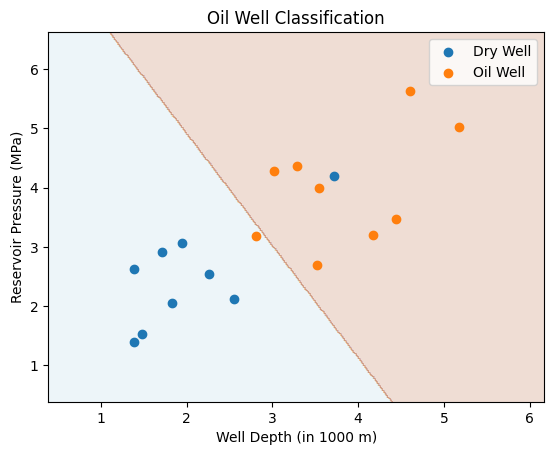

In [4]:
# Create a meshgrid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class labels for the meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and color the regions differently
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
for i in [0, 1]:
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')

plt.title("Oil Well Classification")
plt.xlabel("Well Depth (in 1000 m)")
plt.ylabel("Reservoir Pressure (MPa)")
plt.legend(['Dry Well', 'Oil Well'])
plt.show()

### 5.  Calculate Model Accuracy
Calculate the accuracy of the model using the score method.

In [5]:
# Calculate the accuracy of the model
accuracy = model.score(X, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8888888888888888


### 6.  Generate Confusion Matrix
Generate a confusion matrix to evaluate the performance of the model.

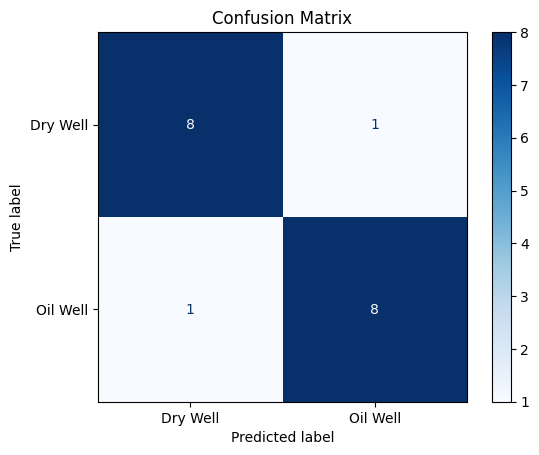

In [8]:
# Predict the labels for the training data
y_pred = model.predict(X)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Dry Well', 'Oil Well'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### 7.  Calculate Precision, Recall, and F1 Score
Calculate the precision, recall, and F1 score of the model.

In [9]:
# Calculate the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: [0.88888889 0.88888889]
Recall: [0.88888889 0.88888889]
F1 Score: [0.88888889 0.88888889]


### 8.  Visualize Decision Boundary with Misclassified Points
Plot the decision boundary and annotate the misclassified points.

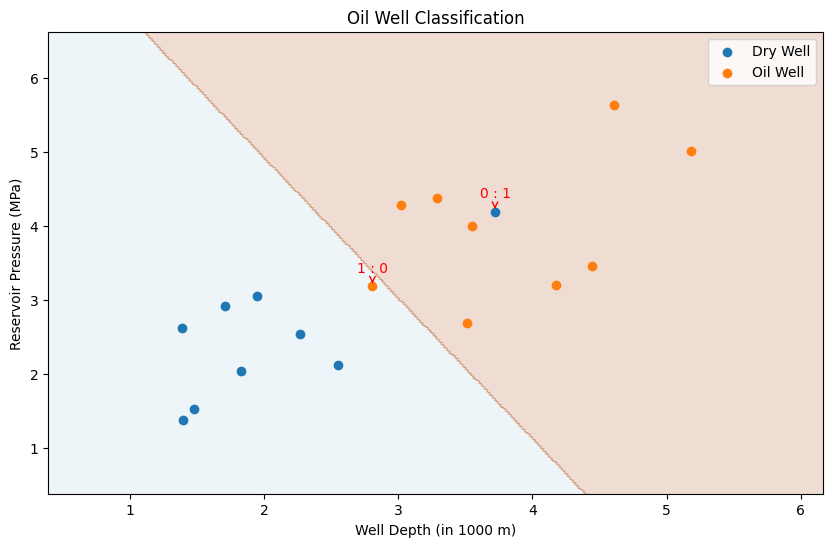

In [19]:
# Plot the decision boundary and annotate the misclassified points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
for i in [0, 1]:
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
plt.title("Oil Well Classification")
for j in range(len(X)):
    true_class = y[j]
    predicted_class = model.predict([X[j]])
    if true_class != predicted_class[0]:
        plt.annotate(f'{true_class} : {predicted_class[0]}', (X[j, 0], X[j, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='red', arrowprops=dict(arrowstyle='->', color='red'))
plt.xlabel("Well Depth (in 1000 m)")
plt.ylabel("Reservoir Pressure (MPa)")
plt.legend(['Dry Well', 'Oil Well'])
plt.show()

### 9.  Predict Class of a New Point
Predict the class of a new point and the probability of each class.
#### TODO: Try different new_point coordinates for prediction

Prediction for [[3 3]]: [0]
Probabilities for [[3 3]]: [[0.50339032 0.49660968]]


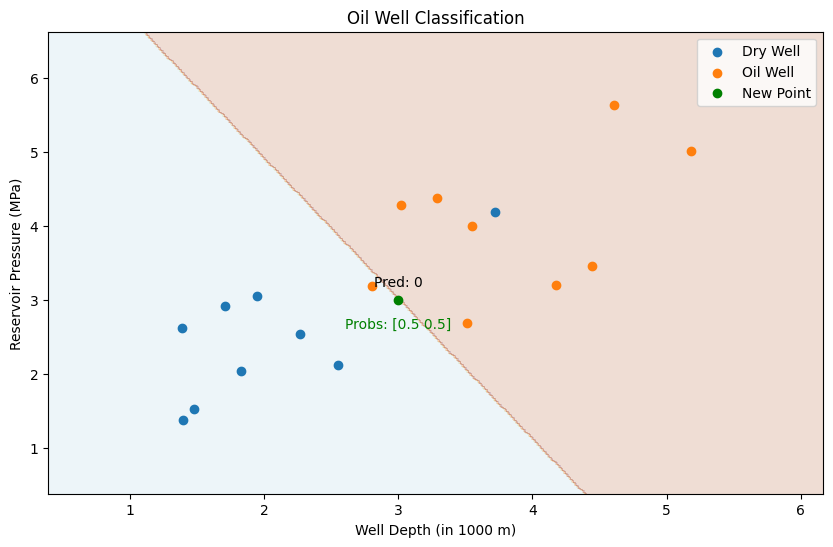

In [20]:
# Predict the class of a new point
new_point = np.array([[3, 3]])  # Define a new point
prediction = model.predict(new_point)  # Predict the class of the new point
print(f"Prediction for {new_point}: {prediction}")  # Print the predicted class

# Predict the probability of each class
probabilities = model.predict_proba(new_point)  # Get the probability of each class
print(f"Probabilities for {new_point}: {probabilities}")  # Print the probabilities

# Plot the decision boundary and annotate the new point
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
for i in [0, 1]:
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
plt.scatter(new_point[0, 0], new_point[0, 1], color='green', label='New Point')  # Plot the new point
plt.title("Oil Well Classification")
plt.annotate(f'Pred: {prediction[0]}', (new_point[0, 0], new_point[0, 1]), textcoords="offset points", xytext=(0,10), ha='center')  # Annotate the predicted class
plt.annotate(f'Probs: {np.round(probabilities[0], 2)}', (new_point[0, 0], new_point[0, 1]), textcoords="offset points", xytext=(0,-20), ha='center', color='green')  # Annotate the probabilities
plt.xlabel("Well Depth (in 1000 m)")
plt.ylabel("Reservoir Pressure (MPa)")
plt.legend(['Dry Well', 'Oil Well', 'New Point'])
plt.show()